# **Introduction**
This is a Machine Learning project using Titanic dataset. The purpose of this project is to predict who will survive and who will die during the titanic tragedy. The prediction will be submitted to join the Kaggel competition.

# **Data**


There are two datasets:**(1) train.csv**, **(2) test.csv**.

**(1) train.csv**
train.csv contains the details of a subset of the passengers on board (891 passengers)

The values in the column ("Survived") can be used to determine whether each passenger survived or not:

* if it's a "1", the passenger survived.
* if it's a "0", the passenger died.

**(2) test.csv**
Using the patterns I find in train.csv, I have to predict whether the other 418 passengers on board (in test.csv) survived

In the following parts, I am going to explore the train data and clean up the data. Then I will try to create models and choose the best model to predict based on the features of passengers.

# **Data Exploration**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the csv file
train_df = pd.read_csv('titanic_train.csv')
test_df =pd.read_csv('titanic_test.csv')

In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
train_df.info()
print('\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

**Indentify the data type of features**
* **Categorical:** Survived,Pclass, Sex, and Embarked
* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Alphanumeric Features:** Ticket, Cabin
* **Typos:** Name

# **Data Exploration**

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Porter, Mr. Walter Chamberlain",male,1601,B96 B98,S
freq,1,577,7,4,644


In [7]:
print(pd.isnull(train_df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

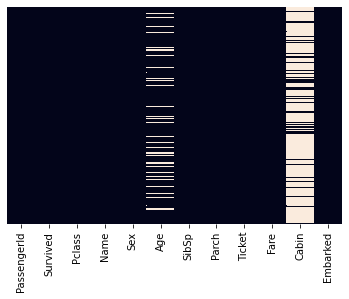

In [8]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

**About the train_df data**
* Total passengers in train.csv are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* There are roughly 20% missing data in Age. I assume that Age is an important feature so I am going to fill the missing value with the mean age of passengers
* There are roughly 80% missing data in Cabin column and this feature may be dropped.
* There are 2 missing data in Embarked
* Ticket may be dropped as there are over 200 duplicates and Ticket inforamtion may not be highly correlated to survival
* Name is not directly related to survival so It may be dropped.

**Assumptions**

In order to predict accurately, I need to explore features which correlate with survivals.It is assumed that:

* Sex: Womens(Sex=female) are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: The upper-class passengers (Pclass=1) are more likely to survive.


**Pclass feature**

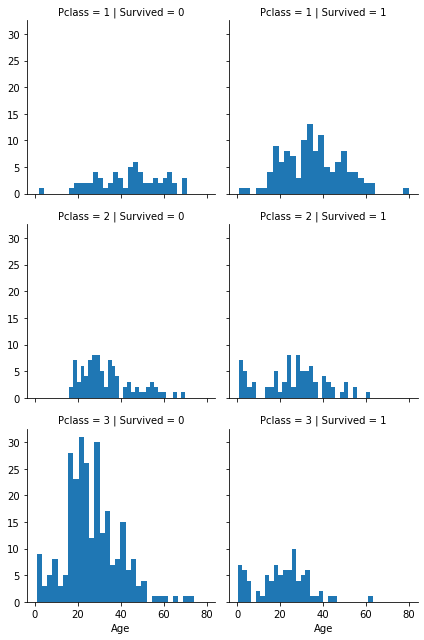

In [9]:
g = sns.FacetGrid(train_df, col='Survived',row='Pclass')
g.map(plt.hist, 'Age', bins=30)

Percentage of Class 1 who survived: 62.96296296296296
Percentage of Class 2 who survived: 47.28260869565217
Percentage of Class 3 who survived: 24.236252545824847


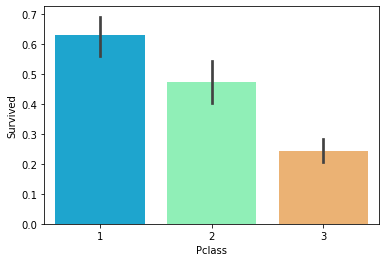

In [10]:
sns.barplot(x="Pclass", y="Survived",data=train_df,palette='rainbow')
#print percentages of classes that survive
print("Percentage of Class 1 who survived:", train_df["Survived"][train_df["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Class 2 who survived:", train_df["Survived"][train_df["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Class 3 who survived:", train_df["Survived"][train_df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

**Sex features**

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


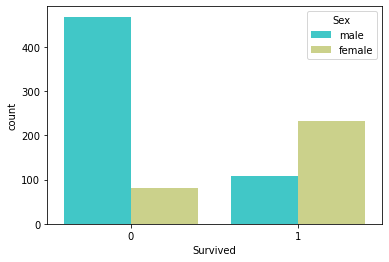

In [11]:
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='rainbow')
#print percentages of females vs. males that survive
print("Percentage of females who survived:", train_df["Survived"][train_df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train_df["Survived"][train_df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

**SibSp feature**

In [12]:
train_df[['SibSp','Survived']].groupby(by='SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


(SibSp=1) are the most likely to survive (53.6%)

**Parch feature**

In [13]:
train_df[['Parch','Survived']].groupby(by='Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


(Parch=3) are the most likely to survive (60%)

**Response to previous assumptions**
* Sex: Womens(Sex=female) are more likely to survive.

  Higly possible
  
* SibSp/Parch: People traveling alone are more likely to survive

  Not really. (SibSp=1) & (Parch=3) are the most likely to survive
  
* Age: Young children are more likely to survive.

  Possible. Young children in class 1 & 2 are rarely dead
  
* Pclass: The upper-class passengers (Pclass=1) are more likely to survive

  The proportion of survivals in class 1 & 2 are more than that of class 3
  
**Sex,Pclass,Age features should be correlated to survivals.**


# **Data Cleaning**

1. Missing value would be filled by imputation
2. Sex and Embarked columns will be transformed into dummies variables
3. Name could be transformed into new feature by extracting their titles
4. Ticket and cabin will be dropped

**Age feature**

missing values will be filled by the median of Age grouped by different classes

In [14]:
# look at the median of Age group by classes
train_df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [15]:
# set up a function to impute median of Age based on individual's Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [16]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

Clean up test_df using the same approach

In [17]:
test_df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,98.0,40.918367,13.956799,6.00,30.0,42.0,50.75,76.0
2,88.0,28.777500,12.943458,0.92,21.0,26.5,35.25,63.0
3,146.0,24.027945,10.537105,0.17,18.5,24.0,29.75,60.5


In [18]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        
        elif Pclass == 2:
            return 26.5
        
        else:
            return 24
        
    else:
        return Age

In [19]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age_test,axis=1)

In [20]:
print(pd.isnull(train_df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
print(pd.isnull(test_df).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Fare feature**

1 missing value will be filled with the mean of the fare

In [22]:
# fill na value in Fare with the mean
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

**Drop Cabin and Ticket Column**

In [23]:
train_df.drop(['Cabin','Ticket'],axis=1,inplace=True)
test_df.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [24]:
print(pd.isnull(train_df).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


**Sex and Embarked features**

In [25]:
# only 2 missing value in Embarked and it is categorical data so I simply drop it
train_df.dropna(inplace=True)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [27]:
# transform the categorical data into dummies variables
train_sex = pd.get_dummies(train_df['Sex'],drop_first=True,dtype='int64')
train_embark = pd.get_dummies(train_df['Embarked'],drop_first=True,dtype='int64')
test_sex = pd.get_dummies(test_df['Sex'],drop_first=True,dtype='int64')
test_embark = pd.get_dummies(test_df['Embarked'],drop_first=True,dtype='int64')

In [28]:
# delete the original sex and embarked columns
train_df.drop(['Sex','Embarked'],axis=1,inplace=True)
test_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [29]:
# Update the dataframe
train_df = pd.concat([train_df,train_sex,train_embark],axis=1)
test_df = pd.concat([test_df,test_sex,test_embark],axis=1)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   male         889 non-null    int64  
 9   Q            889 non-null    int64  
 10  S            889 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 83.3+ KB


**Title features**

In [31]:
#create a combined group
combine = [train_df, test_df]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['male'])

male,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [33]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   male         889 non-null    int64  
 9   Q            889 non-null    int64  
 10  S            889 non-null    int64  
 11  Title        889 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 90.3+ KB


In [35]:
# Drop the orginal column
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

# **Building model**

I am going to use three models (Logistic Regression, Decision Tree,& Random Forest model) to predict. Firstly, I will train up the model by extracting training data from train_df. The predication results from three models will be evalued and the best model will be applied to final prediction on test_df.

### Train test split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
X = train_df.drop(['PassengerId','Survived'],axis=1)
y = train_df['Survived']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Logistic Regression - train and predict**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [42]:
pred_log = logmodel.predict(X_test)

In [43]:
print(accuracy_score(y_test,pred_log))
print('\n')
print(classification_report(y_test,pred_log))
print('\n')
print(confusion_matrix(y_test,pred_log))

0.8389513108614233


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       163
           1       0.86      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267



[[151  12]
 [ 31  73]]


**Decision tree - train and test**

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
pred_tree = dtree.predict(X_test)

In [47]:
print(accuracy_score(y_test,pred_tree))
print('\n')
print(classification_report(y_test,pred_tree))
print('\n')
print(confusion_matrix(y_test,pred_tree))

0.7790262172284644


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       163
           1       0.74      0.67      0.70       104

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



[[138  25]
 [ 34  70]]


**Random forests - train and test**

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
pred_rf = rfc.predict(X_test)

In [50]:
print(accuracy_score(y_test,pred_rf))
print('\n')
print(classification_report(y_test,pred_rf))
print('\n')
print(confusion_matrix(y_test,pred_rf))

0.8389513108614233


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       163
           1       0.83      0.74      0.78       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



[[147  16]
 [ 27  77]]


**Support vector machine - train and test**

In [51]:
from sklearn.svm import SVC

In [53]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [54]:
pred_svc = model.predict(X_test)

In [55]:
print(accuracy_score(y_test,pred_svc))
print('\n')
print(classification_report(y_test,pred_svc))
print('\n')
print(confusion_matrix(y_test,pred_svc))

0.6666666666666666


              precision    recall  f1-score   support

           0       0.67      0.90      0.77       163
           1       0.65      0.31      0.42       104

    accuracy                           0.67       267
   macro avg       0.66      0.60      0.59       267
weighted avg       0.66      0.67      0.63       267



[[146  17]
 [ 72  32]]


#### Opitmized SVC model - train and test

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [58]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [59]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [61]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [62]:
grid_pred = grid.predict(X_test)

In [63]:
print(accuracy_score(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))
print('\n')
print(confusion_matrix(y_test,grid_pred))

0.8426966292134831


              precision    recall  f1-score   support

           0       0.84      0.91      0.88       163
           1       0.84      0.73      0.78       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



[[149  14]
 [ 28  76]]


The optimized SVC model scores the hightest with 0.84 in accuracy_score.

Therefore, **Optimized SVC model** is applied for my prediction.

# **Submmision file**

In [ ]:
predictions = grid.predict(test_df.drop('PassengerId',axis=1))

In [ ]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'],'Survived': predictions})

In [ ]:
submission.to_csv('submission.csv', index=False)

**Reference**
1. [Titanic Survival Predictions (Beginner)](http://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)
2. [Titanic Data Science Solutions](http://www.kaggle.com/startupsci/titanic-data-science-solutions)